In [10]:
import numpy
#import winsound
import scipy.io.wavfile
from scipy.fftpack import dct
from pydub import AudioSegment
from pydub.silence import split_on_silence
import matplotlib.pyplot as plt
import os
intrusion_sounds=os.listdir("Dataset/1_intrusion")



sample_rate, signal = scipy.io.wavfile.read('atm.wav') 
#signal = signal[0:int(3.5 * sample_rate)]  
# Keep the first 3.5 seconds i.e. in 1 sec 8k movements thus in 3.5sec, 3.5*frequency
pre_emphasis = 0.97
emphasized_signal = numpy.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])


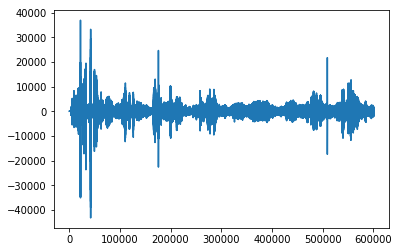

In [11]:
sample_rate, signal = scipy.io.wavfile.read('atm.wav')
#signal = signal[0:int(7 * sample_rate)]
pre_emphasis = 0.97
emphasized_signal = numpy.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])

plt.plot(emphasized_signal)


In [12]:
print(signal)


[   0    0    0 ..., 2065 1686 1405]


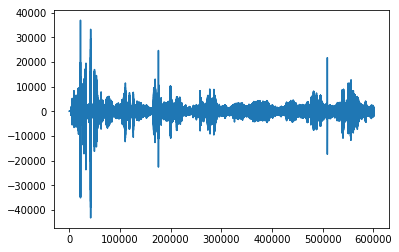

In [23]:
pre_emphasis = 0.97
emphasized_signal = numpy.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])

for i in range(0,len(emphasized_signal)):
    #print(signal[i])
    if(emphasized_signal[i]<100 and emphasized_signal[i]>(-100)):
        emphasized_signal[i]=1
    #print(signal[i])    
plt.plot(emphasized_signal)
               
    

In [24]:
import IPython

#IPython.display.Audio("1.wav")

In [25]:

scipy.io.wavfile.write("atm.wav", sample_rate, emphasized_signal.astype(signal.dtype))
IPython.display.Audio("atm.wav")

In [26]:
path=''
def create_chunks(sound):
    #for i in sounds:
    sound_file = AudioSegment.from_wav(sound)
    print("Average dBFS silence :"+str(sound_file.dBFS))
    avg_silence_threshold=sound_file.dBFS
    audio_chunks = split_on_silence(sound_file, min_silence_len=500,silence_thresh=avg_silence_threshold-2)
    for j, chunk in enumerate(audio_chunks):
        out_file = "chunk{0}.wav".format(j)
        print("exporting", out_file)
        chunk.export(path+out_file, format="wav")
    #print("Done Exporting")
print("Exporting complete")
    
    
create_chunks("atm.wav")  


Exporting complete
Average dBFS silence :-28.267188188957626
exporting chunk0.wav
exporting chunk1.wav
exporting chunk2.wav
exporting chunk3.wav
exporting chunk4.wav
exporting chunk5.wav
exporting chunk6.wav
exporting chunk7.wav
exporting chunk8.wav
exporting chunk9.wav
exporting chunk10.wav
exporting chunk11.wav
exporting chunk12.wav
exporting chunk13.wav
exporting chunk14.wav
exporting chunk15.wav
exporting chunk16.wav
exporting chunk17.wav
exporting chunk18.wav


In [27]:
import audioread
from scipy.signal import lfilter

n = 15  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
yy = lfilter(b,a,y)




from scipy.signal import butter, lfilter, freqz

NameError: name 'y' is not defined

In [ ]:

sample_rate, signal = scipy.io.wavfile.read('atm.wav') 
#signal = signal[0:int(3.5 * sample_rate)]  
# Keep the first 3.5 seconds i.e. in 1 sec 8k movements thus in 3.5sec, 3.5*frequency
pre_emphasis = 0.97
emphasized_signal = numpy.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])

#Framing the audio signal
frame_size=0.012 #24ms
frame_overlap=0.006 #15ms overlap( ~50%)
frame_length=int(round(frame_size*sample_rate))
stride_length=int(round((frame_overlap)*sample_rate))
# Pad the emphasized_signal with zeros in end corresponding to frame size
signal_length=len(emphasized_signal)
print("signal_length:"+str(signal_length)+"  frame_length:"+str(frame_length)+"  stride_length:"+str(stride_length))

no_strides=numpy.ceil((signal_length/stride_length))
print("no_strides:"+str(no_strides))
no_pads=int(abs(signal_length-no_strides*stride_length))
print("no_pads:"+str(no_pads))
z=numpy.zeros(no_pads)
print(numpy.shape(z))
emphasized_signal=numpy.append(emphasized_signal,z)
no_frames=int(len(emphasized_signal))/(stride_length)
print("no_frames:"+str(no_frames))
print(numpy.shape(emphasized_signal))

def create_frames(signal):
    frames=[]
    counter=0
    for i in range(0,len(signal)):
        #frames[counter]=signal[i:(i+frame_length)]
        frames.insert(counter, signal[i:(i+frame_length)])
        i+=stride_length
        counter+=1
    
    return frames

frames=create_frames(emphasized_signal)
    
    

In [ ]:
N=len(frames[50])
T=1.0/sample_rate
xf = numpy.linspace(0.0, N, T)
#fft_frame=fft(frames[50])
plt.plot(frames[4])

In [ ]:
from scipy.fftpack import fft, ifft,fftshift,fftfreq
#plot.set_xlim(0,8000)
N=len(frames[4])
T=1.0/sample_rate
xf = numpy.linspace(0.0, 1.0/(2.0*T), N//2)
fft_frame=fft(frames[4])
plt.plot(xf,numpy.abs(fft_frame[0:N//2]))

In [ ]:
IPython.display.Audio(frames[0])

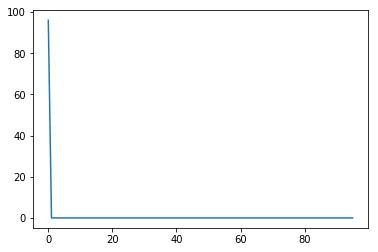

In [14]:
sample_freq =fftfreq(frames[0].size, d =1/sample_rate)
sig_fft = fft(frames[0])
plt.plot(abs(sig_fft))

In [15]:
import scipy.signal
no_frames=int(no_frames)
NFFT=216
for i in range(0,2):
    #frames[i] *= numpy.hamming(frame_length)
    frames[i] *= scipy.signal.hamming(frame_length)
    
    # frames *= 0.54 - 0.46 * numpy.cos((2 * numpy.pi * n) / (frame_length - 1))  # Explicit Implementation **
    mag_frames = numpy.absolute(numpy.fft.rfft(frames[i], NFFT))  # Magnitude of the FFT
    pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))  # Power Spectrum

c:\python\python interpreter\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


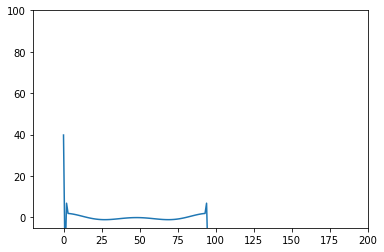

In [16]:
plt.plot(fft(frames[3]))
plt.axis([-20,200,-5,100])
plt.show()

In [17]:
bin=

SyntaxError: invalid syntax (<ipython-input-17-8d06b6b34769>, line 1)

In [ ]:
plt.plot(numpy.fft.rfft(frames[3],512))

In [ ]:
plt.plot(numpy.fft.fft(frames[3]))

In [ ]:
from scipy.signal import butter, filtfilt
import numpy as np

def butter_highpass(cutoff, sample_rate, order=5):
    nyq = 0.5 * sample_rate
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

rawdata = np.loadtxt('sampleSignal.txt', skiprows=0)
signal = rawdata
fs = 100000.0

cutoff = 100
order = 6
conditioned_signal = butter_highpass_filter(signal, cutoff, fs, order)

In [ ]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])